<a href="https://colab.research.google.com/github/s-kamireddy/Logistic-Regression-for-Heart-Attack-Risk-Predictiom/blob/main/projects_in_ai_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# import required libraries from titanic example
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import torch
import warnings
warnings.filterwarnings("ignore")

Part 1:
1. Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations).

  >Deriving the logit function:

  Starting with the liklihood function:

  $L(w) = Π_{y_i = 1}(p(x^i)) * Π_{y_i = 1}(1-p(x^i)) $

  $= Π(p(x^i)^{y^i} + (1-p(x^i))^{1-y^i})$

  Our goal is to minimize this function, the minimum of the log will occur at the same place so we can take the logarithm and divide by the number of samples:

  $l(w) =\frac{1}{n} log(Π(p(x^i)^{y^i} + (1-p(x^i))^{1-y^i}))$

  $ = \frac{1}{n}Σ( y^i log(p(x^i)) + (1-y^i)log(1-p(x^i)) )$

  $p(x^i) = \frac{1}{1+ e^{-wx^i}} $

  $l(w) = \frac{1}{n}Σ( y^i log( \frac{1}{1+ e^{-wx^i}}) + (1-y^i)log(1-  \frac{1}{1+ e^{-wx^i}}) )$

  $ = \frac{1}{n}Σ( y^i log( \frac{1}{1+ e^{-wx^i}}) + (1-y^i)log( \frac{e^{-wx^i}}{1+ e^{-wx^i}}) )$

  $= \frac{1}{n}Σ( y^i (log( \frac{1}{1+ e^{-wx^i}}) - log(\frac{e^{-wx^i}}{1+ e^{-wx^i}}) ) + log( \frac{e^{-wx^i}}{1+ e^{-wx^i}}) )$
  $= \frac{1}{n}Σ( y^i (log( \frac{1}{1+ e^{-wx^i}}) - log(\frac{e^{-wx^i}}{1+ e^{-wx^i}}) ) ) +  \frac{1}{n}log( \frac{e^{-wx^i}}{1+ e^{-wx^i}})  $
  $ =  \frac{1}{n}Σ( y^i (log( \frac{1}{1+ e^{-wx^i}}) - log(\frac{1}{1+ e^{-wx^i}}) + log(e^{-wx^i})) ) +  \frac{1}{n}log( \frac{e^{-wx^i}}{1+ e^{-wx^i}}) = \frac{1}{n}Σ( y^i ( log(e^{-wx^i})) ) +  \frac{1}{n}log( \frac{e^{-wx^i}}{1+ e^{-wx^i}})  $
  $=  \frac{1}{n}Σ( -y^iwx^i) +  \frac{1}{n}log( \frac{e^{-wx^i}}{1+ e^{-wx^i}})$

  which is our objective function.

  The MAP or Maximum a Postori estimate is different from MLE, because where MLE only considers the liklihood of the sample data, MAP considers both the liklihood of data as well as a prior belief distribution, with the goal being to find the most likley model parameters given the data, rather than minimize a loss function.

  Source: https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html

2. Define a machine learning problem you wish to solve using Logistic Regression. Justify
why logistic regression is the best choice and compare it briefly to another linear
classification model (cite your work if this other technique was not covered in class).

The machine learning problem I would like to solve using logistic regression is the liklihood of a heart attack based on a number of demographic and lifestyle factors. This is because the values are binary (heart attack vs. no heart attack) and we want a liklihood as the output of learning (between 0 and 1) making logistic regression a good choice compared to something like linear regression can output any number in the space of real numbers.

3. Discuss how your dataset corresponds to the variables in your equations, highlighting
any assumptions in your derivation from part 1.

Assuming x is [1, x_1, x_2, ... , x_d] and w is of the form [w_0, w_1, w_2, ..., w_d] (where w_0 is the bias and the rest of the w values correspond to weights). $x^i$ corresponds to the lifestyle factors of each individual




Part 2:
----
1. Link to dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset


In [22]:
#2. EDA
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(path +'/heart_attack_prediction_dataset.csv')

Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2


**Data Dictionary**



In [23]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [24]:
df.shape
df.isna().sum()


,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [26]:
df.describe() #dataset stats

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [27]:
df.describe(include=['O'])

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,8763,8763,8763,8763,8763,8763,8763
unique,8763,2,3915,3,20,6,2
top,BMW7812,Male,146/94,Healthy,Germany,Asia,Northern Hemisphere
freq,1,6111,8,2960,477,2543,5660


In [28]:
df["Heart Attack Risk"].value_counts(normalize=True)

,proportion
Heart Attack Risk,
0,0.641789
1,0.358211


In [29]:

# Convert categorical data to numerical data using cat.codes
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].astype('category')
df['Exercise Hours Per Week'] = df['Exercise Hours Per Week'].cat.codes
df['Diet'] = df['Diet'].astype('category')
df['Diet'] = df['Diet'].cat.codes
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes
df['Continent'] = df['Continent'].astype('category')
df['Continent'] = df['Continent'].cat.codes
df['Hemisphere'] = df['Hemisphere'].astype('category')
df['Hemisphere'] = df['Hemisphere'].cat.codes

#convert blood pressure to a simple numeric value using Mean Arterial Blood pressure formula
def bp_value(str):
  str = str.split('/')
  return (float(str[0])+ (2*float(str[1])))/3

df['Blood Pressure'] = df['Blood Pressure'].map(bp_value)

#remove patient ID
df.drop('Patient ID', axis=1, inplace=True)



Mean Arterial Blood Pressure formula source: https://clinicalview.gehealthcare.com/white-paper/measuring-mean-arterial-pressure-choosing-most-accurate-method

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int8   
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   float64
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   int16  
 11  Diet                             8763 non-null   int8   
 12  Previous Heart Probl

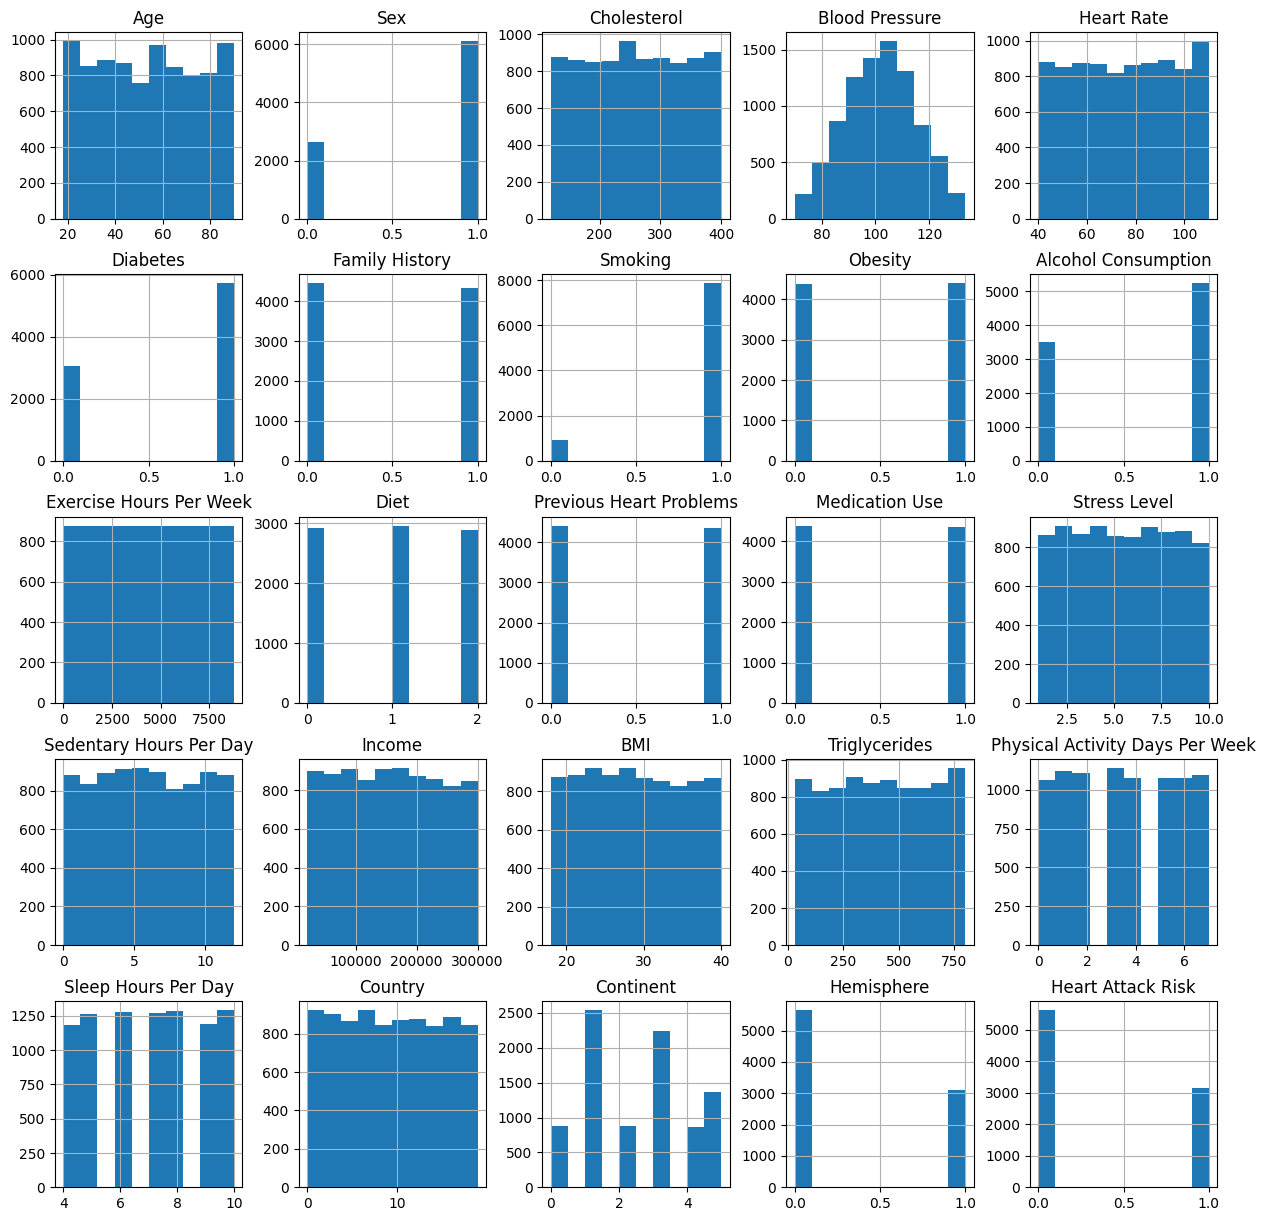

In [31]:
#show distributions
df.hist(figsize=(15,15))
plt.show()

                            feature        VIF
0                               Age   9.124449
1                               Sex   4.750474
2                       Cholesterol  10.738591
3                    Blood Pressure  39.116689
4                        Heart Rate  13.152756
5                          Diabetes   2.845615
6                    Family History   1.963021
7                           Smoking  16.331041
8                           Obesity   1.992428
9               Alcohol Consumption   2.473727
10          Exercise Hours Per Week   3.933757
11                             Diet   2.486000
12          Previous Heart Problems   1.977875
13                   Medication Use   1.987437
14                     Stress Level   4.553042
15          Sedentary Hours Per Day   3.935536
16                           Income   4.760570
17                              BMI  19.302548
18                    Triglycerides   4.401277
19  Physical Activity Days Per Week   3.309257
20           

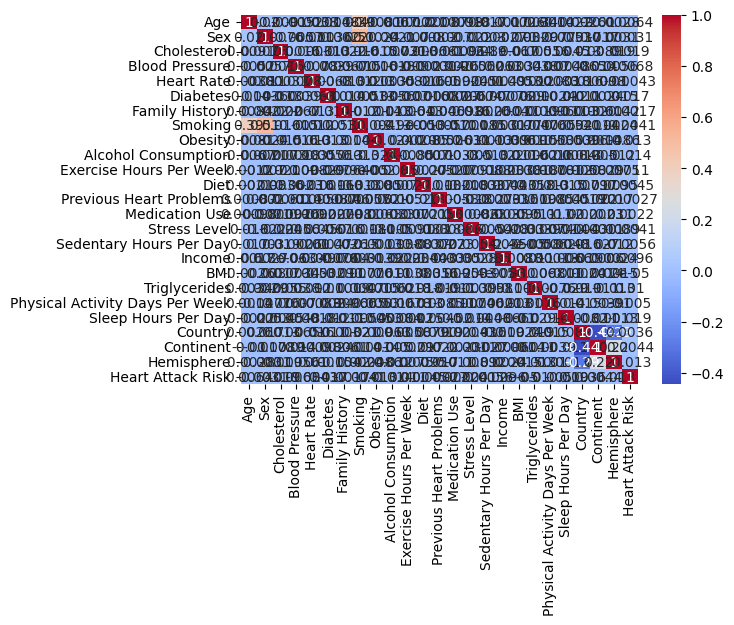

In [32]:
#colinearity
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)
#high vif values indicate colinearity

#check which variables are colinear with the covariance matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

We see high rates of correlation between country, hemisphere, and continent (as expected) but also between age, sex, and smoking (presumably because older people and males are more likley to smoke). Therefore we will remove the hemisphere, continent, and smoking features in this dataset.

In [33]:
df.drop(['Continent', 'Hemisphere', 'Smoking'], axis=1, inplace=True)

In [34]:
#standardizing the data
for column in df.columns:
    df[column] = (df[column] -
                           df[column].mean()) / df[column].std()

Task 3
----
Now we implement the cost function, as well as the three types of vanilla SGD (batch, minibatch, and stochastic)

In [35]:
def logit_cost(X, Y, y_hat, w):#cost function
  return -torch.mean(Y * torch.log(y_hat) + (1 - Y) * torch.log(1 - y_hat))



In [49]:

def gradient_descent_batch( X, Y ):
  losses= []
  w = torch.zeros(X.shape[1], dtype = torch.float64, requires_grad=True)

  for _ in range(100000):
    z = torch.matmul(X, w)
    y_hat = 1 / (1 + torch.exp(-z))
    loss = logit_cost(X, Y, y_hat,w)
    losses.append(loss.item())

    gradient = torch.matmul(X.T, (y_hat - Y)) / X.shape[0]
    w = w - (gradient * .001)

  print(losses)
  plt.plot(losses)
  plt.show()



  return w , losses


In [55]:
def gradient_descent_minibatch( X, Y ):
  losses= []
  w = torch.zeros(X.shape[1], dtype = torch.float64, requires_grad=True)
  xbatches = []
  ybatches = []
  for i in range(0, 69):
    xbatches.append(X[i:i+127])
    ybatches.append(Y[i:i+127])


  for i in range(100000):
    x_batch = xbatches[i % len(xbatches)]
    y_batch = ybatches[i % len(ybatches)]
    z = torch.matmul(x_batch, w)
    y_hat = 1 / (1 + torch.exp(-z))
    loss = logit_cost(x_batch, y_batch, y_hat, w)
    losses.append(loss.item())

    gradient = torch.matmul(x_batch.T, (y_hat - y_batch)) / x_batch.shape[0]
    w = w - (gradient * .00001)

  print(losses)
  plt.plot(losses)
  plt.show()



  return w , losses

In [1]:
def gradient_descent_stochastic( X, Y ):
  losses= []
  w = torch.zeros(X.shape[1], dtype = torch.float64, requires_grad=True)

  for _ in range(1000):
    x = X[np.random.randint(0, X.shape[0])]
    y = Y[np.random.randint(0, Y.shape[0])]
    z = torch.matmul(x, w)
    y_hat = 1 / (1 + torch.exp(-z))
    loss = logit_cost(x, y, y_hat, w)
    losses.append(loss.item())

    gradient = torch.matmul(x.T, (y_hat - y)) / x.shape[0]
    w = w - (gradient * .01)

  print(losses)
  plt.plot(losses)
  plt.show()



  return w , losses

def test_error(X, Y, W):
  

In [39]:
def test_error(X, Y, W):
  z = torch.matmul(X, W)
  y_hat = 1 / (1 + torch.exp(-z))

  error = torch.mean(torch.abs(y_hat - Y))
  return error

In [40]:
Y = df['Heart Attack Risk'].values
X = df.drop('Heart Attack Risk', axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
x_train = torch.tensor(X_train)
x_train = torch.cat((torch.ones(x_train.shape[0], 1), x_train), dim=1)
y_train = torch.tensor(Y_train, dtype = torch.float64)
x_test = torch.tensor(X_test)
x_test = torch.cat((torch.ones(x_test.shape[0], 1), x_test), dim=1)
y_test = torch.tensor(Y_test, dtype = torch.float64)

In [42]:
x_train.dtype

torch.float64

[0.6931471805599454, 0.6928939014013719, 0.6926407491431158, 0.6923877237215372, 0.6921348250730109, 0.6918820531339269, 0.6916294078406905, 0.6913768891297218, 0.6911244969374559, 0.6908722312003439, 0.690620091854851, 0.6903680788374582, 0.6901161920846619, 0.6898644315329736, 0.68961279711892, 0.6893612887790433, 0.6891099064499011, 0.6888586500680663, 0.6886075195701272, 0.6883565148926879, 0.6881056359723675, 0.6878548827458013, 0.6876042551496394, 0.6873537531205478, 0.6871033765952085, 0.6868531255103185, 0.6866029998025912, 0.6863529994087549, 0.6861031242655541, 0.6858533743097491, 0.6856037494781159, 0.6853542497074462, 0.685104874934548, 0.6848556250962444, 0.6846065001293751, 0.6843574999707954, 0.684108624557377, 0.683859873826007, 0.6836112477135886, 0.6833627461570416, 0.6831143690933014, 0.6828661164593197, 0.682617988192064, 0.6823699842285187, 0.6821221045056836, 0.6818743489605752, 0.681626717530226, 0.6813792101516852, 0.6811318267620176, 0.680884567298305, 0.680637

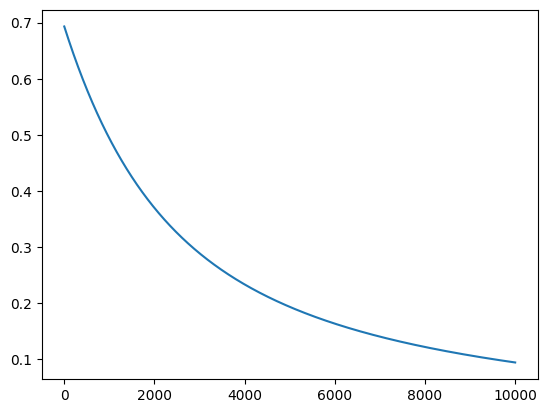

tensor(0.9891, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [48]:
w, loss = gradient_descent_batch(   x_train, y_train)
print(test_error(x_test, y_test, w))


In [56]:
w, loss = gradient_descent_minibatch(   x_train, y_train)
print(test_error(x_test, y_test, w))



KeyboardInterrupt: 

In [2]:
w, loss = gradient_descent_stochastic(   x_train, y_train)
print(test_error(x_test, y_test, w))


NameError: name 'x_train' is not defined

Task 4: Optimization Techniques and Advanced Comparision

In [46]:
def gradient_descent_stochastic_momentum( X, Y ):
  losses = []
  w = torch.zeros(X.shape[1], dtype = torch.float64, requires_grad=True)
  v_w = torch.zeros(X.shape[1], dtype = torch.float64, requires_grad=True)

  alpha = 0.01
  beta = 0.9
  v = 0

  for _ in range(100000):
    x = X[np.random.randint(0, X.shape[0])]
    y = Y[np.random.randint(0, Y.shape[0])]
    z = torch.matmul(x, w)
    y_hat = logit_cost(x, y, y_hat, w)
    loss = logit_cost(x, y, y_hat, w)
    losses.append(loss.item())

    gradient = torch.matmul(x.T, (y_hat - y)) / x.shape[0]

    v = beta * v + (1 - beta) * gradient
    w = w - (alpha * v)

  print(losses)
  plt.plot(losses)
  plt.show()



  return w , losses



